<a href="https://colab.research.google.com/github/playanaC/Skeletonizing_Unet/blob/main/Simulator_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install libraries

In [1]:
!apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (7,991 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpackin

Clone github

In [2]:
! git clone https://github.com/playanaC/Skeletonizing_Unet.git

Cloning into 'Skeletonizing_Unet'...
remote: Enumerating objects: 910, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 910 (delta 21), reused 3 (delta 1), pack-reused 824
Receiving objects: 100% (910/910), 70.99 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (99/99), done.


Folder files SWIG - C++

In [4]:
%cd Skeletonizing_Unet/Simulator_image/

/content/Skeletonizing_Unet/Simulator_image


Find opencv folder

In [3]:
!pkg-config --cflags --libs opencv

-I/usr/include/opencv -lopencv_shape -lopencv_stitching -lopencv_superres -lopencv_videostab -lopencv_aruco -lopencv_bgsegm -lopencv_bioinspired -lopencv_ccalib -lopencv_datasets -lopencv_dpm -lopencv_face -lopencv_freetype -lopencv_fuzzy -lopencv_hdf -lopencv_line_descriptor -lopencv_optflow -lopencv_video -lopencv_plot -lopencv_reg -lopencv_saliency -lopencv_stereo -lopencv_structured_light -lopencv_phase_unwrapping -lopencv_rgbd -lopencv_viz -lopencv_surface_matching -lopencv_text -lopencv_ximgproc -lopencv_calib3d -lopencv_features2d -lopencv_flann -lopencv_xobjdetect -lopencv_objdetect -lopencv_ml -lopencv_xphoto -lopencv_highgui -lopencv_videoio -lopencv_imgcodecs -lopencv_photo -lopencv_imgproc -lopencv_core


Update g++ compiler


In [5]:
!g++ -v

Using built-in specs.
COLLECT_GCC=g++
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/7/lto-wrapper
OFFLOAD_TARGET_NAMES=nvptx-none
OFFLOAD_TARGET_DEFAULT=1
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 7.5.0-3ubuntu1~18.04' --with-bugurl=file:///usr/share/doc/gcc-7/README.Bugs --enable-languages=c,ada,c++,go,brig,d,fortran,objc,obj-c++ --prefix=/usr --with-gcc-major-version-only --program-suffix=-7 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --enable-bootstrap --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-libmpx --enable-plugin --enable-default-pie --with-system-zlib --with-target-system-zlib --enable-objc-gc=auto --enable-multiarch --disable-werror --with-arch-32=i686 --with-abi=m64 --with

In [6]:
!apt install g++-9
!update-alternatives --remove-all gcc 
!update-alternatives --remove-all g++

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-9 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-9 20

!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc

!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-clang-9' for regex 'g++-9'
Note, selecting 'clang-9' for regex 'g++-9'
Note, selecting 'clang-9-examples' for regex 'g++-9'
Note, selecting 'libclang-9-dev' for regex 'g++-9'
Note, selecting 'clang-9-doc' for regex 'g++-9'
The following additional packages will be installed:
  binfmt-support fonts-mathjax libclang-common-9-dev libclang-cpp9 libclang1-9
  libffi-dev libjs-mathjax libllvm9 libomp-9-dev libomp5-9 libpfm4 llvm-9
  llvm-9-dev llvm-9-runtime llvm-9-tools python-chardet python-pkg-resources
  python-pygments python-yaml python3-pkg-resources python3-pygments
  python3-yaml
Suggested packages:
  fonts-mathjax-extras fonts-stix libjs-mathjax-doc libomp-9-doc llvm-9-doc
  python-setuptools ttf-bitstream-vera python3-setuptools
The following NEW packages will be installed:
  binfmt-support clang-9 clang-9-doc clang-9-examples fonts-mathjax
  libclang-9-dev libcl

Compile files SWIG

In [7]:
!swig -I/content/Skeletonizing_Unet/Simulator_image/opencv-swig-master/lib -I/usr/include/ -w972 -c++ -python /content/Skeletonizing_Unet/Simulator_image/Simulator.i
!swig -I/content/Skeletonizing_Unet/Simulator_image/opencv-swig-master/lib -I/usr/include/ -w972 -c++ -python /content/Skeletonizing_Unet/Simulator_image/Create_image.i

Compile files C++

In [8]:
!g++ -shared -fpic /content/Skeletonizing_Unet/Simulator_image/Simulator_wrap.cxx $(pkg-config --cflags --libs python3) $(pkg-config --cflags --libs opencv) -o /content/Skeletonizing_Unet/Simulator_image/_Simulator.so
!g++ -shared -fpic /content/Skeletonizing_Unet/Simulator_image/Create_image_wrap.cxx $(pkg-config --cflags --libs python3) $(pkg-config --cflags --libs opencv) -o /content/Skeletonizing_Unet/Simulator_image/_Create_image.so

Show all files (hide files)

In [9]:
!ls /content/Skeletonizing_Unet/Simulator_image/ -al

total 23768
drwxr-xr-x 5 root root    4096 Mar 21 11:53 .
drwxr-xr-x 5 root root    4096 Mar 21 11:50 ..
drwxr-xr-x 2 root root    4096 Mar 21 11:50 backgrounds
-rw-r--r-- 1 root root    5070 Mar 21 11:50 Create_image.hpp
-rw-r--r-- 1 root root     327 Mar 21 11:50 Create_image.i
-rw-r--r-- 1 root root  484944 Mar 21 11:52 Create_image.py
-rwxr-xr-x 1 root root 5965240 Mar 21 11:53 _Create_image.so
-rw-r--r-- 1 root root 5567925 Mar 21 11:52 Create_image_wrap.cxx
drwxr-xr-x 5 root root    4096 Mar 21 11:50 opencv-swig-master
-rw-r--r-- 1 root root   28145 Mar 21 11:50 Simulator.hpp
-rw-r--r-- 1 root root     514 Mar 21 11:50 Simulator.i
-rw-r--r-- 1 root root  478187 Mar 21 11:52 Simulator.py
-rwxr-xr-x 1 root root 6113416 Mar 21 11:52 _Simulator.so
-rw-r--r-- 1 root root 5619499 Mar 21 11:52 Simulator_wrap.cxx
drwxr-xr-x 2 root root   36864 Mar 21 11:50 tracks


Create PTS files

In [10]:
import os
import sys
import time
import random
import sys
sys.path.append('/content/Skeletonizing_Unet/Simulator_image')

import ctypes
ctypes.cdll.LoadLibrary('/content/Skeletonizing_Unet/Simulator_image/_Simulator.so')
import Simulator

In [11]:
# Input variables
total_image = 30
worms = 16
parall = 6
coll = 6
velocity = 1
day_init_exp = 1

In [39]:
path_tracks = '/content/Skeletonizing_Unet/Simulator_image' + '/tracks/'
path_backgrounds = '/content/Skeletonizing_Unet/Simulator_image' + '/backgrounds/'
fold_exp_sim = '/content/Skeletonizing_Unet/Simulator_image' + '/Data/'

if not os.path.exists(fold_exp_sim):
    os.makedirs(fold_exp_sim)

start = time.perf_counter()
Simulator.Simulate(path_tracks, path_backgrounds, fold_exp_sim, worms, parall, coll, velocity, day_init_exp, total_image)
end = time.perf_counter()
time_fn = (end - start)


newSubFolderF = fold_exp_sim + 'day = ' + str(day_init_exp) + ' cond = X pla = 1 living_worms = ' + str(worms) + '/'
print(newSubFolderF)
print(day_init_exp, ") Time measured (worms=",worms,", images=",total_image,"):", time_fn*1000, "[ms]")


/content/Skeletonizing_Unet/Simulator_image/Data/day = 1 cond = X pla = 1 living_worms = 16/
1 ) Time measured (worms= 16 , images= 30 ): 89.79652900001156 [ms]


Create and show image

In [13]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

import sys
sys.path.append('/content/Skeletonizing_Unet/Simulator_image')

import ctypes
ctypes.cdll.LoadLibrary('/content/Skeletonizing_Unet/Simulator_image/_Create_image.so')
import Create_image

Time measured: 56.657895000000735 [ms]


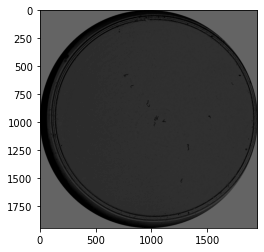

In [40]:
path_data = newSubFolderF + 'RASP06_000001.pts'

path_background_data = newSubFolderF + '/background'
file = open(path_background_data, 'r')
data = file.read()
background_name = data.split(',')[0]
path_background = path_backgrounds + background_name

start = time.perf_counter()
# Gray image low resolution
Mat_img = Create_image.Create_image(path_data,path_background)
np_img = np.asarray(Mat_img)
img = Image.fromarray(np_img).convert('L')
img = np.asarray(img)
img = cv2.blur(img, (3, 3))
end = time.perf_counter()
time_cpp = end - start

print("Time measured:", time_cpp*1000, "[ms]")

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()




Functions to get skeletons

In [15]:
def build_skel(H, W, XY_skels):
    mask = np.zeros((H, W))
    for XY_skel in XY_skels:
        for XY in XY_skel:
            mask[XY[0], XY[1]] = 1
    return mask


def get_skeletons(path_data, ptsN):
    file = open(path_data, 'r')
    skel = []
    skel_xtremes = []
    for line in file:
        data = line.split('P')
        try:
            XY_list_str = data[1].split(";")
            X = []
            Y = []
            for XY_p in XY_list_str:
                XY_list = XY_p.split()
                X.append(int(XY_list[0]))
                Y.append(int(XY_list[1]))

            X_xtremes = X[0:ptsN] + X[len(X) - ptsN:len(X)]
            Y_xtremes = Y[0:ptsN] + Y[len(Y) - ptsN:len(Y)]

            X_center = X[ptsN:len(X)-ptsN]
            Y_center = Y[ptsN:len(Y)-ptsN]

            points = np.transpose(np.vstack([Y_center, X_center]))
            points_xtremes = np.transpose(np.vstack([Y_xtremes, X_xtremes]))

            skel.append(points)
            skel_xtremes.append(points_xtremes)
        except:
            v=0

    skl = build_skel(1944, 1944, skel)
    skl_ends = build_skel(1944, 1944, skel_xtremes)

    zrs = RGB = np.ones((1944, 1944))
    RGB = np.zeros((1944, 1944, 3))
    RGB[:, :, 0] = (zrs - (skl+skl_ends))*255
    RGB[:, :, 1] = skl_ends*255
    RGB[:, :, 2] = skl*255

    return RGB

Show skeletons

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


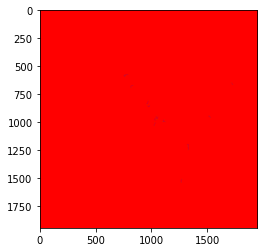

In [41]:
SKL_img = get_skeletons(path_data,5)
plt.imshow(SKL_img)
plt.show()

Select and show worms and skeletons

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


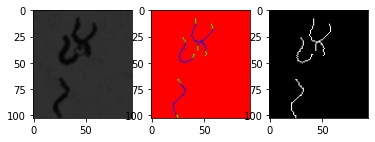

In [57]:
from skimage.measure import label, regionprops

skl_mask = (SKL_img[:,:,1]>1)*1 + (SKL_img[:,:,2]>1)*1
skl_mask = ((skl_mask > 0 ) * 255).astype(np.uint8)
mask_labels = label(skl_mask)
props = regionprops(mask_labels)

worm_number = 7 #select worm3 5
nnw = 26
r0, c0, r1, c1 = props[worm_number].bbox
r0 = r0 - nnw
c0 = c0 - nnw
r1 = r1 + nnw*2
c1 = c1 + nnw*2

gray_crop = img[r0:r1, c0:c1]
skl_crop = skl_mask[r0:r1, c0:c1]

shape_arr = skl_crop.shape
rgb_crop = np.zeros((shape_arr[0], shape_arr[1], 3))
rgb_crop[:,:,0] = SKL_img[r0:r1, c0:c1, 0]
rgb_crop[:,:,1] = SKL_img[r0:r1, c0:c1, 1]
rgb_crop[:,:,2] = SKL_img[r0:r1, c0:c1, 2]

f, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(gray_crop, cmap='gray', vmin=0, vmax=255)
ax1.imshow(rgb_crop)
ax2.imshow(skl_crop, cmap='gray', vmin=0, vmax=255)
plt.show()